# 1. PCA

- Dealing with **Curse of Dimensionality**

  - High diemensional data might be very sparse, so the training data are far from each other
  - This causes extrapolation and affect bad impact on prediction
  - Hemce, more dimension causes overfitting
  - One way to deal with the cuse of dimensionality is to increase the training size to reduce the sparsity

- PCA reduces the dimensionality of data by transforming it into a set of new variables that caputures the most important patterns
- the "Principal component" is a line the with largest variance from the training data with the smallest lose of information


### Principal compenent with scikit-learn


In [21]:
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml


mnist = fetch_openml('mnist_784', as_frame = False)

X_train, y_train = mnist.data[:60_000], mnist.target[:60_000]
X_test, y_test = mnist.data[60_000:], mnist.target[60_000:]

pca = PCA(n_components = 5)

X2D = pca.fit_transform(X_train) # it contains the transformed data

# Principal components
print(f"Shape of the principal components: {pca.components_.shape}")
print(f"principal components \n {pca.components_}")
print(f"Explained Variance ratio: {pca.explained_variance_ratio_}")


### Choosing proper dimension


In [56]:
import numpy as np

from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml


mnist = fetch_openml('mnist_784', as_frame = False)

X_train, y_train = mnist.data[:60_000], mnist.target[:60_000]
X_test, y_test = mnist.data[60_000:], mnist.target[60_000:]


# 1. Finding the best d by compute all PCAs
print("Method 1")
pca = PCA()
pca.fit(X_train)

# cumulative sum of explained variance ratio 
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1 # get max number of component that explan the most variance

print(f"""
      Original Dimension: {X_train.shape[1]}
      Number of principal components: {d}
      Dimension reductions: {X_train.shape[1]-d}
      """)

 # Run PCA again with the best components
pca = PCA(n_components = int(d))
pca.fit(X_train)

# 2. Finding the best d by explained ratio
print("Method 2")
pca = PCA(n_components = 0.95) # Run PCA again with the best components
pca.fit(X_train)
print(f"""
      Original Dimension: {X_train.shape[1]}
      Number of principal components: {pca.n_components_}
      Explained Variance ratio: {np.cumsum(pca.explained_variance_ratio_)[-1]}
      Dimension reductions: {X_train.shape[1]-d}
      """)

Method 1

      Original Dimension: 784
      Number of principal components: 154
      Dimension reductions: 630
      
Method 2

      Original Dimension: 784
      Number of principal components: 154
      Explained Variance ratio: 0.950196019261303
      Dimension reductions: 630
      


### Visualization of pricipal compnents and its explained variance


550    0.106223
523    0.106025
551    0.101502
578    0.099515
495    0.099163
         ...   
367    0.000437
395    0.000421
76     0.000415
311    0.000403
721    0.000392
Length: 500, dtype: float64

First Principal Component Feature Importances:
 550    0.106223
523    0.106025
551    0.101502
578    0.099515
495    0.099163
496    0.098830
577    0.098345
468    0.097206
522    0.095485
440    0.093762
524    0.093693
400    0.091019
467    0.090864
412    0.090847
428    0.090482
456    0.089451
372    0.089030
455    0.088837
483    0.088713
549    0.088082
568    0.087948
384    0.087587
484    0.087076
511    0.086844
427    0.086333
540    0.085786
605    0.085717
439    0.085452
512    0.085160
539    0.085108
345    0.084735
441    0.084349
413    0.083523
469    0.083376
356    0.083339
344    0.082767
579    0.082469
317    0.082350
596    0.082283
411    0.081827
373    0.081789
385    0.081771
399    0.081407
567    0.081363
597    0.081015
604    0.080239
357    0.079839
552    0.079113
494    0.078722
328    0.078495
dtype: float64


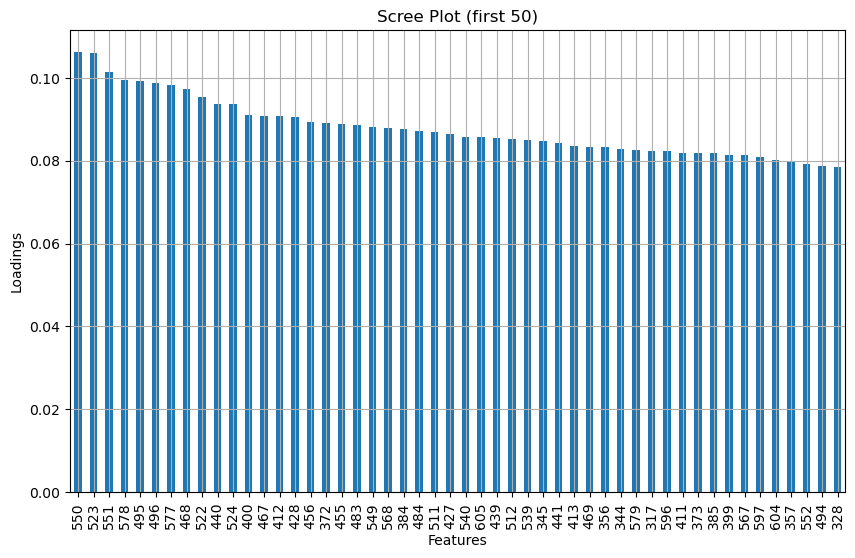

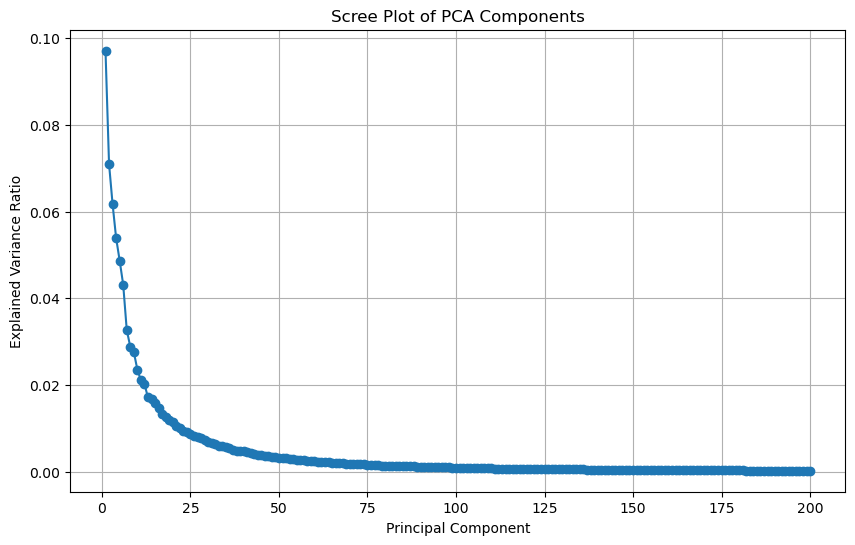

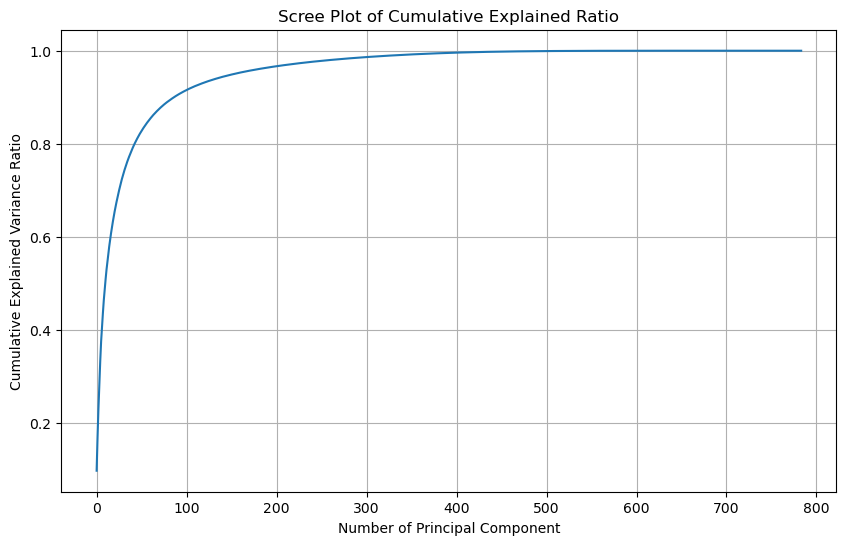

In [77]:
import matplotlib.pyplot as plt
import pandas as pd

pca = PCA()
pca.fit(X_train)

# Get loading value from the first cn
loading_first_component = pca.components_[0]

# 각 피처의 중요도를 정렬된 순서로 확인
feature_importance = pd.Series(np.abs(loading_first_component))
sorted_feature_importance = feature_importance.sort_values(ascending=False)
sorted_feature_importance = sorted_feature_importance.iloc[:50]
print("First Principal Component Feature Importances:\n", sorted_feature_importance)

plt.figure(figsize=(10, 6))
sorted_feature_importance.plot(kind='bar')
plt.xlabel('Features')
plt.ylabel('Loadings')
plt.title('Scree Plot (first 50)')
plt.grid(True)
plt.show()

# scree plot
explained_variance_ratio_example = pca.explained_variance_ratio_[:200]
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio_example) + 1), explained_variance_ratio_example, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot of PCA Components')
plt.grid(True)
plt.show()


# cumulative sum of explained variance ratio 
cumsum = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(10, 6))
plt.plot(cumsum)
plt.xlabel('Number of Principal Component')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Scree Plot of Cumulative Explained Ratio')
plt.grid(True)
plt.show()

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import make_pipeline

clf = make_pipeline(PCA(random_state=42), RandomForestClassifier())

param_distrib = {
    "pca__n_components" : np.arange(10, 80),
    "randomforestclassifier__n_estimators": np.arange(50,500)
}

rnd_search = RandomizedSearchCV(clf, param_distrib, n_iter=10, cv = 3)

rnd_search.fit(X_train[:1000], y_train[:1000])

print(rnd_search.best_params_)

{'randomforestclassifier__n_estimators': np.int64(480), 'pca__n_components': np.int64(46)}


### Random PCA

- Algorithm to find PCA faster


In [ ]:
rnd_pca = PCA(n_components= 154, svd_solver="randomized") # for full
X_reduced = rnd_pca.fit_transform(X_train)

### Incremental PCA

- Inc PCA does not load all data on memory, but it handles data by small batch size
- memory optimization
- use for large data set


In [55]:
from sklearn.decomposition import IncrementalPCA

n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
for X_batch in np.array_split(X_train, n_batches):
    inc_pca.partial_fit(X_batch)
X_reduced = inc_pca.transform(X_train)

### UMAP


In [ ]:
import umap
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import pandas as pd

# Load Iris dataset

data = load_iris()
X, y = data.data, data.target
feature_names = data.feature_names

# Split into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply UMAP for dimensionality reduction

umap_transformer = umap.UMAP(n_components=2, random_state=42)
X_train_reduced = umap_transformer.fit_transform(X_train)
X_test_reduced = umap_transformer.transform(X_test)
